<a href="https://colab.research.google.com/github/mbarragan744/clase-IA/blob/main/proyecto_en_clase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub

# Download latest version
path = kagglehub.dataset_download("akshaydattatraykhare/diabetes-dataset")

print("Path to dataset files:", path)

100%|██████████| 8.91k/8.91k [00:00<00:00, 9.72MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/akshaydattatraykhare/diabetes-dataset/versions/1


In [2]:
df=pd.read_csv(path+"/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.shape

(768, 9)

modelo supervisado-clasificacion

separar los features del label

In [4]:
X=df.drop('Outcome',axis=1)
y=df['Outcome']

In [8]:
#vamos a normalizar MinMax los features del dataframe X
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_scaled=scaler.fit_transform(X)
X=pd.DataFrame(X, columns=df.columns[:-1])
X.var()

,0
Pregnancies,11.354056
Glucose,1022.248314
BloodPressure,374.647271
SkinThickness,254.473245
Insulin,13281.180078
BMI,62.159984
DiabetesPedigreeFunction,0.109779
Age,138.303046


In [13]:
#USAR VirianceTrehold para eliminar los features que tengan las varianzas mas bajas <0.1
from sklearn.feature_selection import VarianceThreshold
selector=VarianceThreshold(threshold=0.02)
X_clean=selector.fit_transform(X)
X_clean

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [14]:
selector.feature_names_in_

array(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
       'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'], dtype=object)

In [15]:
print(selector.get_feature_names_out())

['Pregnancies' 'Glucose' 'BloodPressure' 'SkinThickness' 'Insulin' 'BMI'
 'DiabetesPedigreeFunction' 'Age']


In [16]:
X_clean=pd.DataFrame(X_clean, columns=selector.get_feature_names_out())
X_clean.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0


ahora que ya tuve la vista minable, coy a dividir los datos entrenamiento y prueba

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_clean, y, test_size=0.2, random_state=42, stratify=y)

In [19]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((614, 8), (154, 8), (614,), (154,))

<Axes: >

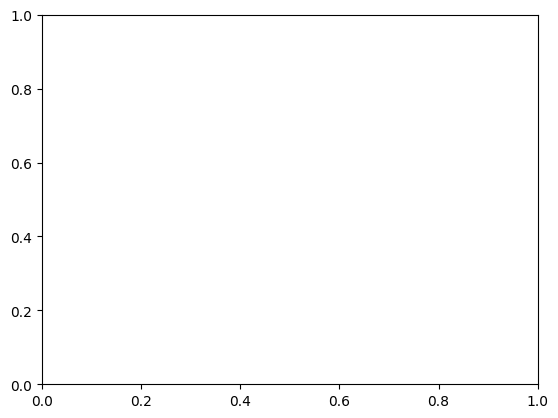

In [20]:
sns.countplot(X=y_train)

In [22]:
from imblearn.over_sampling import MinMaxScaler
scaler=MinMaxScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)


ImportError: cannot import name 'MinMaxScaler' from 'imblearn.over_sampling' (/usr/local/lib/python3.11/dist-packages/imblearn/over_sampling/__init__.py)